In [24]:
import numpy as np
import sys

sys.path.append('../src')

import cpu
import program
import importlib
cpu = importlib.reload(cpu)
program = importlib.reload(program)

p = program.Program.from_file('../programs/initial_program.txt')
p_snake = program.Program.from_file('../programs/snake_game.txt')
p_first = program.Program.from_file('../programs/first_program.txt')
p_2 = program.Program.from_file('../programs/program2.txt')
p_branch = program.Program.from_file('../programs/branch_program.txt')
p = program.Program.from_array(np.array(['a9', 'c0', 'aa', 'e8', '69', 'c4', '00']))
p_push = program.Program.from_array(np.array(['a2', '00', 'a0', '00', '8a', '99', '00', '02', '48', 'e8', 'c8', 'c0', '10', 'd0', 'f5', '68', '99', '00', '02', 'c8', 'c0', '20', 'd0', 'f7']))
p_pull = program.Program.from_array(np.array(['99', '00', '02', 'c8', 'c0', '20', 'd0', 'f7']))
p_jump = program.Program.from_file('../programs/jump_program.txt')
p_jsr_rts = program.Program.from_file('../programs/jsr_rts.txt')

p_talk = program.Program.from_array(np.array(['A9', '0A', '8D', '2C', '01', 'A9', '03', '8D', '2D', '01', 'A9', '23', '8D', '2E', '01']))

In [25]:
# Initialise CPU
#from cpu import cpu
daveNES = cpu.MOS6502()
daveNES.connect_to_bus()

In [26]:
daveNES.load_program(p_snake)
daveNES.reset()

In [27]:
daveNES.run_program()
#daveNES.ram.visualise_memory()
#print(daveNES.ram.memory[0x0200: 0x0205])
daveNES.reset()

/Users/davidkersh/Documents/Other_Work/Coding/daveNES/notebooks/../src/cpu/opcodes.py:301: RuntimeWarning: overflow encountered in scalar subtract
  result = np.uint8(self.cpu.r_accumulator) - value
/Users/davidkersh/Documents/Other_Work/Coding/daveNES/notebooks/../src/cpu/opcodes.py:338: RuntimeWarning: overflow encountered in scalar subtract
  self.cpu.r_index_X -= np.uint8(1)


BREAK


In [23]:
daveNES.bus.wram.memory[0x012c], daveNES.bus.wram.memory[0x012d], daveNES.bus.wram.memory[0x012e]

(10, 3, 35)

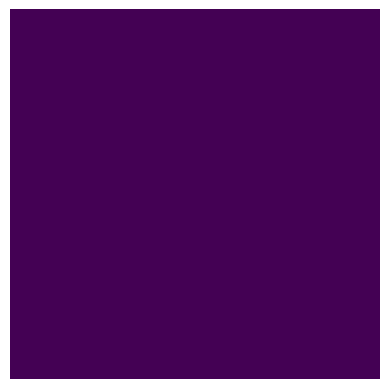

In [15]:
daveNES.bus.wram.visualise_memory()

In [6]:
50441 & 0b0000_0111_1111

9

In [8]:
hex(1023)

'0x3ff'

In [ ]:
r_status = 0b0000_0100

In [ ]:
r_status = r_status & ~(1<<2)

In [ ]:
r_status

In [ ]:
np.uint8(83) + ~(np.uint8(32)) + np.uint8(1)

In [ ]:
np.uint8(0xFE)

In [ ]:
daveNES.ram.visualise_memory()

In [6]:
hex(10)

'0xa'

In [5]:
LDA #$0A
STA $012c
LDA #$03
STA $012d
LDA #$23
STA $012e

In [10]:
hex(35)

'0x23'

In [ ]:
import pygame
import time

data = daveNES.ram.memory[0x0200:0x05FF+1]
data = np.reshape(data, (32, 32))

pygame.init()
screen = pygame.display.set_mode((320, 320))

surf = pygame.surfarray.make_surface(data)

scaled_surf = pygame.transform.scale(surf, (320, 320))

screen.blit(scaled_surf, (0, 0))

pygame.display.update()

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    time.sleep(0.01)
pygame.quit()